In [3]:
# Import librarires
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Load Dataset
df = pd.read_csv('Loan.Csv')

In [5]:
# look at dataset
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
# Basic summary 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
# Check missing values
print(df.isnull().sum())
print('Total percent of Missing Values')
print((df.isnull().sum().sum()) / len(df) *100)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Total percent of Missing Values
24.267100977198698


In [8]:
# import warnings 
import warnings
warnings.filterwarnings('ignore')

In [9]:
# fill some features at once using loop
cat_feature = ['Gender','Married','Self_Employed']
for col in cat_feature:
    mode = df[col].mode()[0]
    df[col].fillna(mode,inplace=True)

In [10]:
# fill some features at once using loop
num_feature = ['Credit_History','Loan_Amount_Term','LoanAmount']
for col in num_feature:
    df[col].fillna(df[col].median(),inplace=True)

In [11]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [13]:
# Replace "3+" with 3
df['Dependents'] = df['Dependents'].str.replace('3+','3')
df['Dependents'] = df['Dependents'].astype(float)

In [14]:
# Fill missing values
df['Dependents'].fillna(df['Dependents'].mean(),inplace=True)
df['Dependents'] = df['Dependents'].astype(int)

In [15]:
# Check Duplicates
df.duplicated().sum()

np.int64(0)

In [16]:
# Drop "LoanID" feature
df.drop('Loan_ID',axis=1,inplace=True)

**Feature Engineering**

In [17]:
# Check unique values
df['Loan_Amount_Term'].unique()

array([360., 120., 240., 180.,  60., 300., 480.,  36.,  84.,  12.])

In [18]:
# Convert months into year and make new feature of year
one_year = 12
df['Year'] = df['Loan_Amount_Term'] / one_year
df.drop('Loan_Amount_Term',axis=1,inplace=True)
df.rename(columns={'Year':'Loan_Amount_Term'},inplace=True)

In [19]:
# This gives a better sense of the household’s financial capacity
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [20]:
# Estimate monthly loan payment
df['EMI'] = df['LoanAmount'] / df['Loan_Amount_Term']

**Exploratory Data Analysis**

In [21]:
df.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status,Loan_Amount_Term,TotalIncome,EMI
0,Male,No,0,Graduate,No,5849,0.0,128.0,1.0,Urban,Y,30.0,5849.0,4.266667
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,1.0,Rural,N,30.0,6091.0,4.266667
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,1.0,Urban,Y,30.0,3000.0,2.200000


In [22]:
# Check Gender married and loan status
df.groupby(['Gender','Married','Loan_Status']).size()

Gender  Married  Loan_Status
Female  No       N               29
                 Y               51
        Yes      N                8
                 Y               24
Male    No       N               50
                 Y               83
        Yes      N              105
                 Y              264
dtype: int64

In [23]:
# Check min, max and mean of LoadAmount for different years
df.groupby('Loan_Amount_Term')['LoanAmount'].agg([min,max,'mean'])

,min,max,mean
Loan_Amount_Term,,,
1.0,111.0,111.0,111.000000
3.0,80.0,155.0,117.500000
5.0,125.0,155.0,140.000000
7.0,105.0,172.0,132.250000
10.0,17.0,25.0,22.333333
15.0,40.0,600.0,146.636364
20.0,50.0,205.0,120.750000
25.0,60.0,700.0,185.153846
30.0,9.0,600.0,145.724335


In [24]:
# Check Education
df.groupby('Gender')['Education'].value_counts()

Gender  Education   
Female  Graduate         92
        Not Graduate     20
Male    Graduate        388
        Not Graduate    114
Name: count, dtype: int64

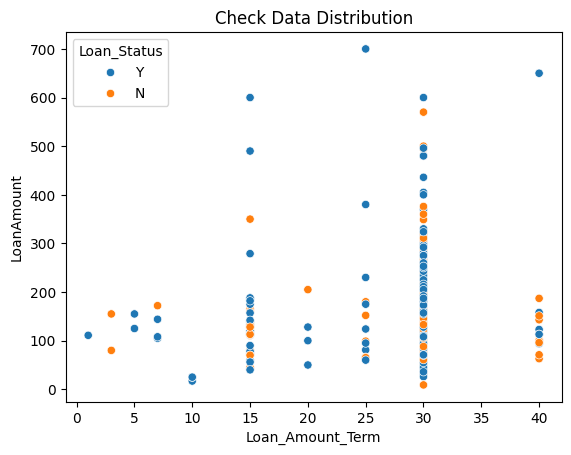

In [25]:
sns.scatterplot(x='Loan_Amount_Term',y='LoanAmount',hue='Loan_Status',data=df)
plt.title("Check Data Distribution")
plt.show()

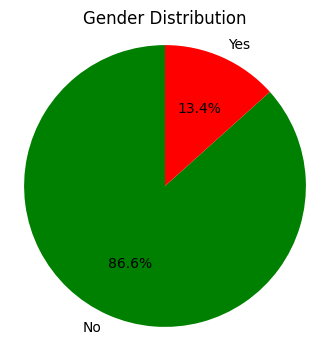

In [26]:
# Sample data: counts of each gender
gender_counts = df['Self_Employed'].value_counts()

# Labels and sizes
labels = gender_counts.index
sizes = gender_counts.values

# Pie chart
plt.figure(figsize=(4,4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
plt.title('Gender Distribution')
plt.axis('equal')  # Ensures the pie is a circle
plt.show()

In [27]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status,Loan_Amount_Term,TotalIncome,EMI
0,Male,No,0,Graduate,No,5849,0.0,128.0,1.0,Urban,Y,30.0,5849.0,4.266667
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,1.0,Rural,N,30.0,6091.0,4.266667
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,1.0,Urban,Y,30.0,3000.0,2.200000
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,1.0,Urban,Y,30.0,4941.0,4.000000
4,Male,No,0,Graduate,No,6000,0.0,141.0,1.0,Urban,Y,30.0,6000.0,4.700000


In [28]:
# Encode "Categorical" Feature
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
feature = ['Gender','Married','Education','Self_Employed','Property_Area']
df[feature] = oe.fit_transform(df[feature])

In [29]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status,Loan_Amount_Term,TotalIncome,EMI
0,1.0,0.0,0,0.0,0.0,5849,0.0,128.0,1.0,2.0,Y,30.0,5849.0,4.266667
1,1.0,1.0,1,0.0,0.0,4583,1508.0,128.0,1.0,0.0,N,30.0,6091.0,4.266667
2,1.0,1.0,0,0.0,1.0,3000,0.0,66.0,1.0,2.0,Y,30.0,3000.0,2.200000
3,1.0,1.0,0,1.0,0.0,2583,2358.0,120.0,1.0,2.0,Y,30.0,4941.0,4.000000
4,1.0,0.0,0,0.0,0.0,6000,0.0,141.0,1.0,2.0,Y,30.0,6000.0,4.700000


In [30]:
# Scale Some Feature
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled = ['ApplicantIncome','CoapplicantIncome','LoanAmount','TotalIncome']
df[scaled] = pd.DataFrame(ss.fit_transform(df[scaled]),columns=scaled)

In [31]:
df.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status,Loan_Amount_Term,TotalIncome,EMI
0,1.0,0.0,0,0.0,0.0,0.072991,-0.554487,-0.211241,1.0,2.0,Y,30.0,-0.182184,4.266667
1,1.0,1.0,1,0.0,0.0,-0.134412,-0.038732,-0.211241,1.0,0.0,N,30.0,-0.144684,4.266667
2,1.0,1.0,0,0.0,1.0,-0.393747,-0.554487,-0.948996,1.0,2.0,Y,30.0,-0.623656,2.200000


Split data into "x" and "y"

In [32]:
x = df.drop('Loan_Status',axis=1)
y = df['Loan_Status']

Set data into Training and Testing

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=44)

Apply Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

In [35]:
from sklearn.metrics import accuracy_score
score  = accuracy_score(y_test,lg.predict(x_test))
print(f'score: {score * 100:.2f}%')

score: 83.74%


Apply SVC Algorithm

In [36]:
from sklearn.svm import SVC
svc = SVC(kernel='poly')
svc.fit(x_train,y_train)

SVC(kernel='poly')

In [37]:
svc.score(x_test,y_test), svc.score(x_train,y_train)

(0.7398373983739838, 0.6741344195519349)

Apply RandomForest Algorithm

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=120,max_depth=7,min_samples_split=7)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=7, min_samples_split=7, n_estimators=120)

In [39]:
rf.score(x_test,y_test), rf.score(x_train,y_train)

(0.8455284552845529, 0.8533604887983707)

In [40]:
# Check Accuracy Score
from sklearn.metrics import accuracy_score
score  = accuracy_score(y_test,rf.predict(x_test))
print(f'score: {score * 100:.2f}%')

score: 84.55%


RandomForest give best accuracy, so lets try to improve it

In [41]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
accuracy = cross_val_score(rf,x,y,cv=10)
print("accuracy:",accuracy)

accuracy: [0.80645161 0.82258065 0.72580645 0.77419355 0.78688525 0.78688525
 0.81967213 0.85245902 0.80327869 0.86885246]


In [42]:
print(f"Mean Accuracy: {accuracy.mean():.4f}")
print(f"Std Deviation: {accuracy.std():.4f}")

Mean Accuracy: 0.8047
Std Deviation: 0.0384


In [ ]:
# Check Feature Importance
rf.feature_importances_

array([0.00473758, 0.00997015, 0.01954277, 0.01298354, 0.00794678,
       0.09416102, 0.06065583, 0.08216176, 0.4506012 , 0.02920231,
       0.03709497, 0.10480935, 0.08613276])

Hyper Parameter Tunning

In [303]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 2, 4,6,8],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(rf, param_grid, cv=2)

In [304]:
grid.fit(x_train,y_train)

GridSearchCV(cv=2,
             estimator=RandomForestClassifier(max_depth=7, min_samples_split=7,
                                              n_estimators=120),
             param_grid={'max_depth': [None, 2, 4, 6, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]})

In [ ]:
# Check score
grid.best_score_

np.float64(0.8044549527127924)

Confusion Matrix

In [318]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score,  f1_score
cf = confusion_matrix(y_test,rf.predict(x_test))
print(cf)

[[16 16]
 [ 3 88]]


In [ ]:
# Check F1 score
f1 = f1_score(y_test, rf.predict(x_test), average='weighted') # It is because "y" is in numerical
print('F1 Score:', f1)

F1 Score: 0.8309899569583932


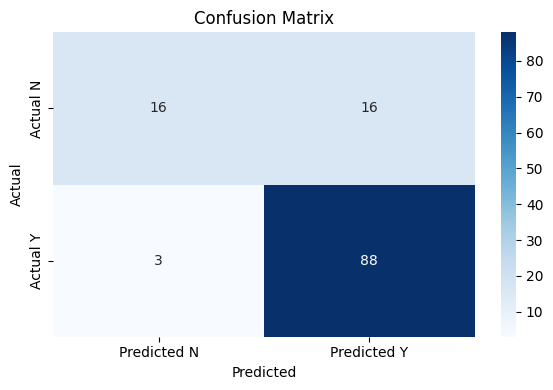

In [ ]:
# Ploting
plt.figure(figsize=(6, 4))
sns.heatmap(cf, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted N', 'Predicted Y'], yticklabels=['Actual N', 'Actual Y'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()


In [138]:
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status,Loan_Amount_Term,TotalIncome,EMI
0,1.0,0.0,0,0.0,0.0,0.072991,-0.554487,-0.211241,1.0,2.0,Y,30.0,-0.182184,4.266667
1,1.0,1.0,1,0.0,0.0,-0.134412,-0.038732,-0.211241,1.0,0.0,N,30.0,-0.144684,4.266667


In [ ]:
# Make Prediction
rf.predict([[1.0,0.0,0,0.0,0.0,0.072991,-0.554487,-0.211241,1.0,2.0,30.0,-0.182184,4.266667]])

array(['Y'], dtype=object)

Save the Model

In [141]:
import joblib
joblib.dump(rf, "rf.pkl")

['rf.pkl']

In [ ]:
# Load the Model
model = joblib.load("rf.pkl")

In [143]:
model.predict([[1.0,0.0,0,0.0,0.0,0.072991,-0.554487,-0.211241,1.0,2.0,30.0,-0.182184,4.266667]])

array(['Y'], dtype=object)